In [ ]:
import numpy as np #
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [5]:
train_df.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train_df.drop(columns = ['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'MasVnrType', 'Alley', 'LotFrontage'], axis = 1, inplace = True)
test_df.drop(columns = [ 'MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'MasVnrType', 'Alley', 'LotFrontage'], axis = 1, inplace = True)

In [9]:
train_df.isnull().sum()


Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [10]:
test_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 73, dtype: int64

In [11]:
important_features = ['YearBuilt','LotArea','OverallQual','OverallCond','GrLivArea','1stFlrSF','2ndFlrSF','BedroomAbvGr','OpenPorchSF','PoolArea','SalePrice']
train_df[important_features].describe()


,YearBuilt,LotArea,OverallQual,OverallCond,GrLivArea,1stFlrSF,2ndFlrSF,BedroomAbvGr,OpenPorchSF,PoolArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,10516.828082,6.099315,5.575342,1515.463699,1162.626712,346.992466,2.866438,46.660274,2.758904,180921.195890
std,30.202904,9981.264932,1.382997,1.112799,525.480383,386.587738,436.528436,0.815778,66.256028,40.177307,79442.502883
min,1872.000000,1300.000000,1.000000,1.000000,334.000000,334.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,1954.000000,7553.500000,5.000000,5.000000,1129.500000,882.000000,0.000000,2.000000,0.000000,0.000000,129975.000000
50%,1973.000000,9478.500000,6.000000,5.000000,1464.000000,1087.000000,0.000000,3.000000,25.000000,0.000000,163000.000000
75%,2000.000000,11601.500000,7.000000,6.000000,1776.750000,1391.250000,728.000000,3.000000,68.000000,0.000000,214000.000000
max,2010.000000,215245.000000,10.000000,9.000000,5642.000000,4692.000000,2065.000000,8.000000,547.000000,738.000000,755000.000000


VIZULAIZE

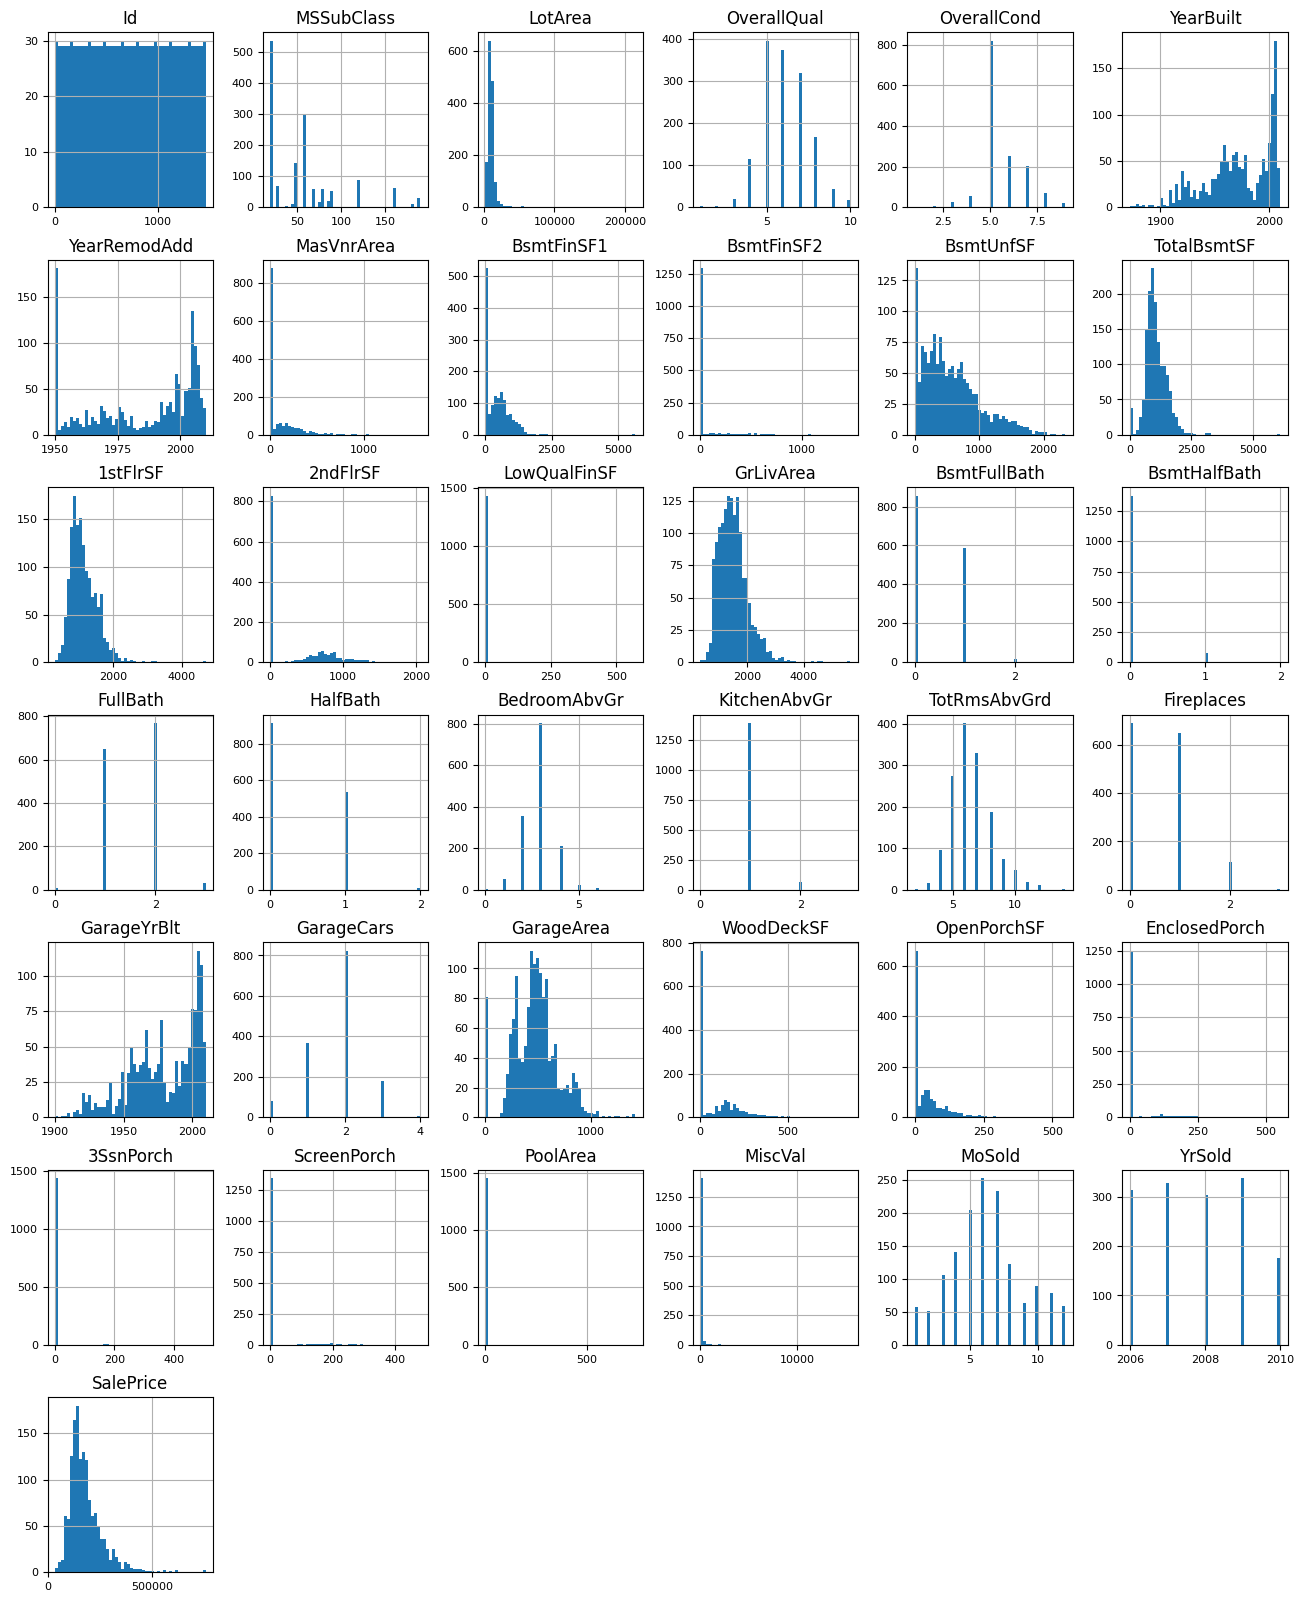

In [12]:
numerical_features = train_df.select_dtypes(exclude=['object'])
numerical_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

DISTRIBUTION OD SALES PRICES

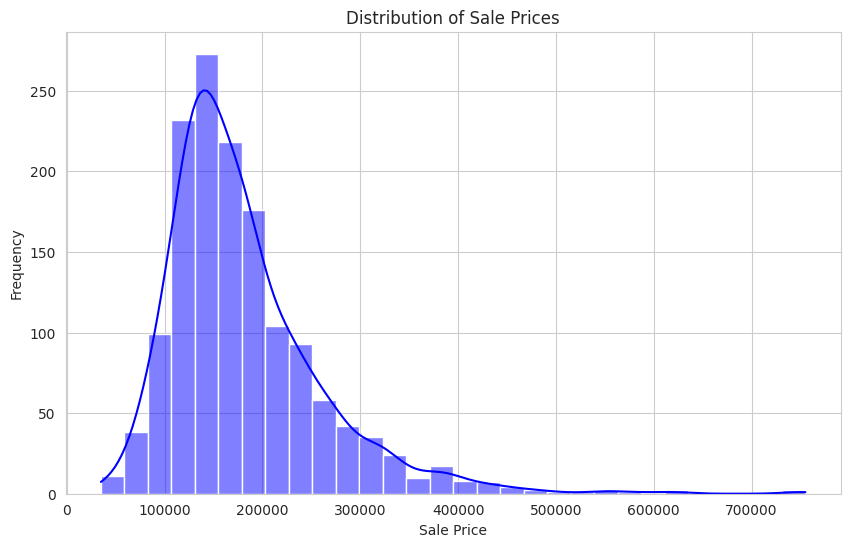

In [13]:
sns.set_style("whitegrid")

# Distribution of Sale Prices
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

COREELATION HEATMAP

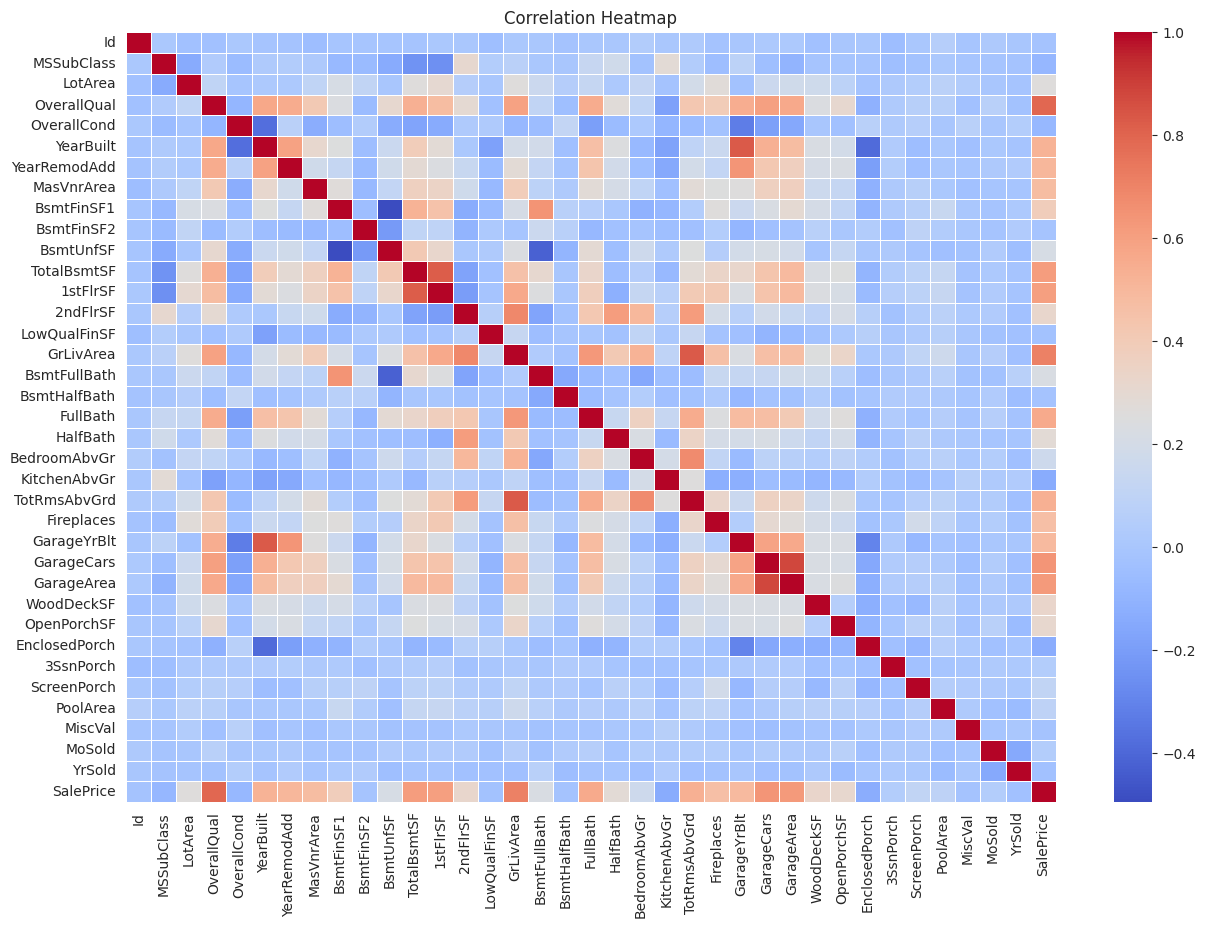

In [14]:
# Correlation matrix of numerical features
corr_matrix = train_df.select_dtypes(include=['int64', 'float64']).corr()

# Heatmap of correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

BOX PLOT OF SALES PRICES BY OVERALL QUALITY

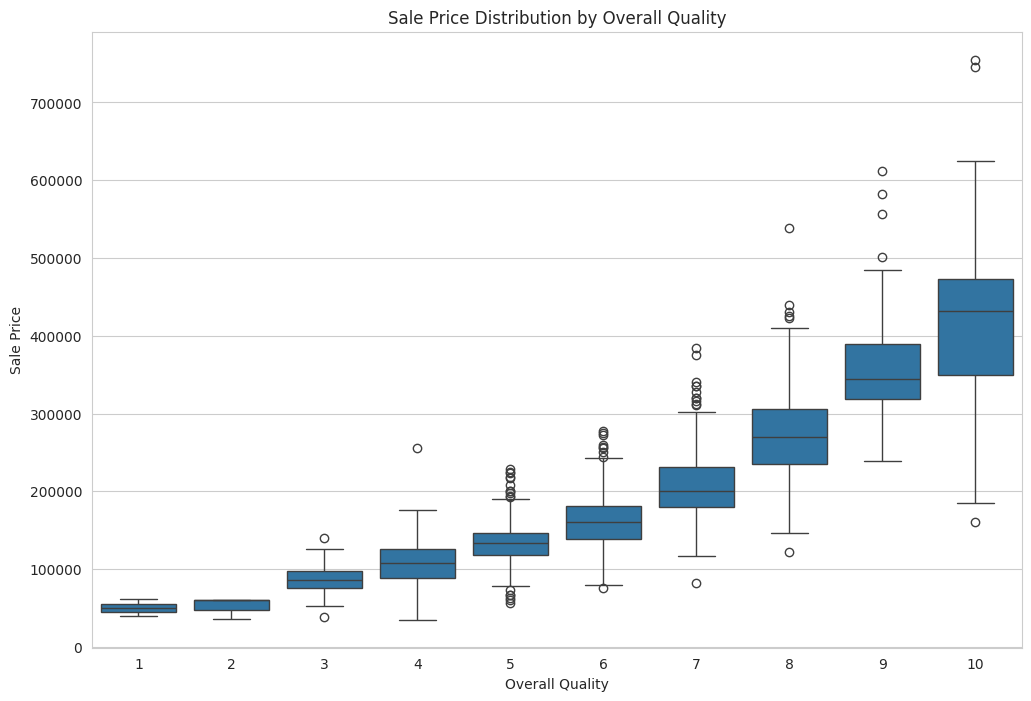

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('Sale Price Distribution by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

PREPROCESSING THE DATA

In [17]:

X_train = train_df.drop(['Id', 'SalePrice'], axis=1)
y_train = np.log(train_df['SalePrice'])
X_test = test_df.drop(['Id'], axis=1)


numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

RANDOM FOREST CLASSIFIER

In [18]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

# Train the model
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtF...
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=0))])

PREDICTION AND SUBMISSION

In [19]:
predictions_log_scale = my_pipeline.predict(X_test)

# Convert predictions back from log scale
predictions = np.exp(predictions_log_scale)

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predictions
})

predictions_df.head(5)

,Id,SalePrice
0,1461,126588.767122
1,1462,149847.301320
2,1463,179767.294772
3,1464,181226.687093
4,1465,196099.575850


In [20]:
predictions_df.to_csv("submission.csv", index=False)